In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread


(299, 299)

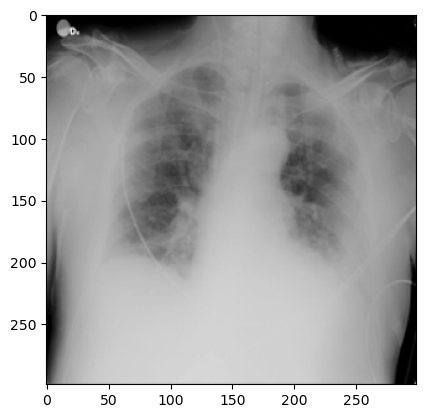

In [271]:
# Carregando a imagem
img = imread('COVID-1.png', as_gray=True)
plt.imshow(img, cmap='gray')

img.shape

(415, 640, 3)

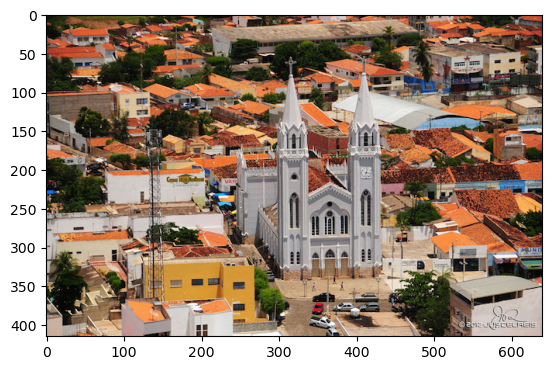

In [260]:
img = imread('picos.jpg')
plt.imshow(img)

img.shape

In [ ]:
print(img)

In [ ]:
# Crie um algoritmo que implemente filtros de convolução. O algoritmo deverá receber como 
# parâmetro a imagem a ser processada, o filtro e o tratamento a ser feito na borda.
# A função, obrigatoriamente, deverá seguir a seguinte nomenclatura:

In [248]:
def trataBordas(img, filtro, borda='ignore'):
    linhas_to_add = (filtro.shape[0] - 1) // 2
    colunas_to_add = (filtro.shape[1] - 1) // 2
    try:
        canais = img.shape[2]
    except:
        canais = 1
    # o ‘espelho’: no tratamento da borda os pixels serão espelhados;
    # o ‘zero’: o tratamento da borda será adicionando pixels de valor zero;
    # o ‘replicar’: nesse caso, no tratamento da borda somente os pixels das linhas
    # extremas serão replicados.
    if canais == 1:
        if borda == 'ignore':
            imagem_bordas_tratadas = img.copy()
        else:
            imagem_bordas_tratadas = np.zeros((linhas_to_add + img.shape[0], colunas_to_add + img.shape[1]))
            if borda == 'zero':
                for i in range(1, imagem_bordas_tratadas.shape[0] - 1):
                    for j in range(1, imagem_bordas_tratadas.shape[1] - 1):
                        imagem_bordas_tratadas[i][j] = img[i - 1][j - 1]
    else:
        if borda == 'ignore':
            imagem_bordas_tratadas = img.copy()
        else:
            imagem_r = np.zeros((linhas_to_add + img.shape[0], colunas_to_add + img.shape[1]))
            imagem_g = np.zeros((linhas_to_add + img.shape[0], colunas_to_add + img.shape[1]))
            imagem_b = np.zeros((linhas_to_add + img.shape[0], colunas_to_add + img.shape[1]))
            if borda == 'zero':
                for i in range(1, imagem_r.shape[0] - 1):
                    for j in range(1, imagem_r.shape[1] - 1):
                        imagem_r[i][j] = img[i - 1][j - 1][0]
                        imagem_g[i][j] = img[i - 1][j - 1][1]
                        imagem_b[i][j] = img[i - 1][j - 1][2]
            imagem_bordas_tratadas = np.dstack((imagem_r, imagem_g, imagem_b))
    return imagem_bordas_tratadas, canais


In [ ]:
kernel = np.array([[2, 1, 6], [3, 6, 2], [6, 2, 7]])

In [ ]:
kernel.shape

In [217]:
imagem_bordas_tratadas = trataBordas(img, kernel, borda='ignore')

In [218]:
print(imagem_bordas_tratadas)

(array([[185,  40,   0, ...,   0,  24, 131],
       [ 75,  14,   0, ...,   0,   8,  42],
       [ 11,   2,   0, ...,   1,   3,  12],
       ...,
       [ 78,  62,  68, ...,   3,  13,  27],
       [104,  74,  75, ...,   1,  23,  83],
       [156,  90,  78, ...,   1,  45, 167]], dtype=uint8), 1)


In [ ]:
def median(imagem_bordas_tratadas, imagem_processada, linhas_add, colunas_add):
    for i in range(linhas_add, imagem_bordas_tratadas.shape[0] - linhas_add):
        for j in range(colunas_add, imagem_bordas_tratadas.shape[1] - colunas_add):
            imagem_processada[i - linhas_add][j - colunas_add] = np.median(imagem_bordas_tratadas[i - linhas_add:i + linhas_add + 1, j - colunas_add:j + colunas_add + 1])
    return imagem_processada

In [ ]:
def calc_moda(kernel):
    vals, counts = np.unique(kernel, return_counts=True)

    maior_quantidade = counts.max()

    modas = vals[counts == maior_quantidade]
    
    return modas.mean()


In [ ]:
def moda(imagem_bordas_tratadas, imagem_processada, linhas_add, colunas_add):
    for i in range(linhas_add, imagem_bordas_tratadas.shape[0] - linhas_add):
        for j in range(colunas_add, imagem_bordas_tratadas.shape[1] - colunas_add):
            imagem_processada[i - linhas_add][j - colunas_add] = calc_moda(imagem_bordas_tratadas[i - linhas_add:i + linhas_add + 1, j - colunas_add:j + colunas_add + 1])
    return imagem_processada 

In [ ]:
def max(imagem_bordas_tratadas, imagem_processada, linhas_add, colunas_add):
    for i in range(linhas_add, imagem_bordas_tratadas.shape[0] - linhas_add):
        for j in range(colunas_add, imagem_bordas_tratadas.shape[1] - colunas_add):
            imagem_processada[i - linhas_add][j - colunas_add] = np.max(imagem_bordas_tratadas[i - linhas_add:i + linhas_add + 1, j - colunas_add:j + colunas_add + 1])
    return imagem_processada 

In [ ]:
def min(imagem_bordas_tratadas, imagem_processada, linhas_add, colunas_add):
    for i in range(linhas_add, imagem_bordas_tratadas.shape[0] - linhas_add):
        for j in range(colunas_add, imagem_bordas_tratadas.shape[1] - colunas_add):
            imagem_processada[i - linhas_add][j - colunas_add] = np.min(imagem_bordas_tratadas[i - linhas_add:i + linhas_add + 1, j - colunas_add:j + colunas_add + 1])
    return imagem_processada 

In [235]:
def no_linear_filters(img, kernel, borda='ignore', filter='median'):
    imagem_bordas_tratadas, canais = trataBordas(img, kernel, borda)
    linhas_add = (kernel.shape[0] - 1) // 2
    colunas_add = (kernel.shape[1] - 1) // 2
    if canais == 1:
        imagem_processada = np.zeros((img.shape[0], img.shape[1]))
        if filter == 'median':
            imagem_processada = median(imagem_bordas_tratadas, imagem_processada, linhas_add, colunas_add)
        elif filter == 'moda':
            imagem_processada = moda(imagem_bordas_tratadas, imagem_processada, linhas_add, colunas_add)
        elif filter == 'max':
            imagem_processada = max(imagem_bordas_tratadas, imagem_processada, linhas_add, colunas_add)
        elif filter == 'min':
            imagem_processada = min(imagem_bordas_tratadas, imagem_processada, linhas_add, colunas_add)
    else:
        imagem_r = np.zeros((img.shape[0], img.shape[1]))
        imagem_g = np.zeros((img.shape[0], img.shape[1]))
        imagem_b = np.zeros((img.shape[0], img.shape[1]))
        if filter == 'median':
            imagem_r = median(imagem_bordas_tratadas[:, :, 0], imagem_r, linhas_add, colunas_add)
            imagem_g = median(imagem_bordas_tratadas[:, :, 1], imagem_g, linhas_add, colunas_add)
            imagem_b = median(imagem_bordas_tratadas[:, :, 2], imagem_b, linhas_add, colunas_add)
        elif filter == 'moda':
            imagem_r = moda(imagem_bordas_tratadas[:, :, 0], imagem_r, linhas_add, colunas_add)
            imagem_g = moda(imagem_bordas_tratadas[:, :, 1], imagem_g, linhas_add, colunas_add)
            imagem_b = moda(imagem_bordas_tratadas[:, :, 2], imagem_b, linhas_add, colunas_add)
        elif filter == 'max':
            imagem_r = max(imagem_bordas_tratadas[:, :, 0], imagem_r, linhas_add, colunas_add)
            imagem_g = max(imagem_bordas_tratadas[:, :, 1], imagem_g, linhas_add, colunas_add)
            imagem_b = max(imagem_bordas_tratadas[:, :, 2], imagem_b, linhas_add, colunas_add)
        elif filter == 'min':
            imagem_r = min(imagem_bordas_tratadas[:, :, 0], imagem_r, linhas_add, colunas_add)
            imagem_g = min(imagem_bordas_tratadas[:, :, 1], imagem_g, linhas_add, colunas_add)
            imagem_b = min(imagem_bordas_tratadas[:, :, 2], imagem_b, linhas_add, colunas_add)
        imagem_processada = np.dstack((imagem_r, imagem_g, imagem_b))


    return imagem_processada.astype(np.uint8)
            


In [267]:
imagem_mediana = no_linear_filters(img, kernel, borda='zero', filter='median')
imagem_moda = no_linear_filters(img, kernel, borda='zero', filter='moda')
imagem_max = no_linear_filters(img, kernel, borda='zero', filter='max')
imagem_min = no_linear_filters(img, kernel, borda='zero', filter='min')

In [312]:
from skimage.util import random_noise
#img_noise = random_noise(img, mode='s&p', amount=0.1)
img_noise = imread('Two-examples-of-noisy-images-salt-and-pepper-noise-on-the-left-and-Gaussian-noise.png')

In [307]:
print(img_noise)

[[0.7254902  0.15686275 0.         ... 0.         0.09411765 1.        ]
 [0.29411765 0.05490196 0.         ... 1.         0.03137255 0.16470588]
 [0.04313725 0.00784314 0.         ... 0.00392157 0.01176471 0.04705882]
 ...
 [0.30588235 0.24313725 0.26666667 ... 0.01176471 0.05098039 0.10588235]
 [0.40784314 0.29019608 0.29411765 ... 0.00392157 0.09019608 0.3254902 ]
 [0.61176471 0.         0.30588235 ... 0.00392157 0.17647059 0.65490196]]


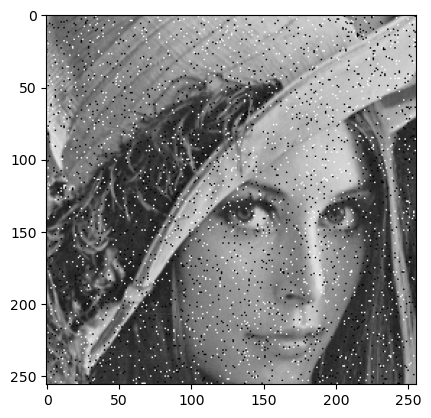

In [313]:
plt.imshow(img_noise, cmap='gray')

In [317]:
#imagem_mediana = no_linear_filters((img_noise*255).astype('int'), kernel, borda='ignore', filter='median')
imagem_mediana = no_linear_filters(img_noise, kernel, borda='ignore', filter='median')

In [318]:
imagem_mediana.max()

229

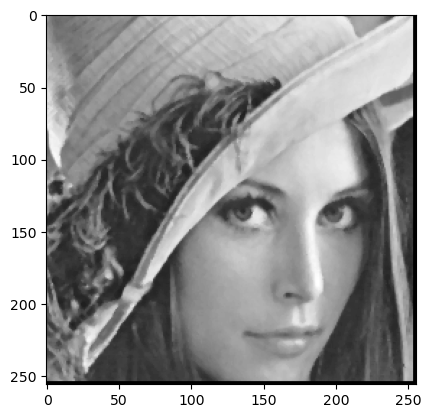

In [319]:
plt.imshow(imagem_mediana, cmap='gray')

In [256]:
print((imagem_max>=imagem_min).all())

True


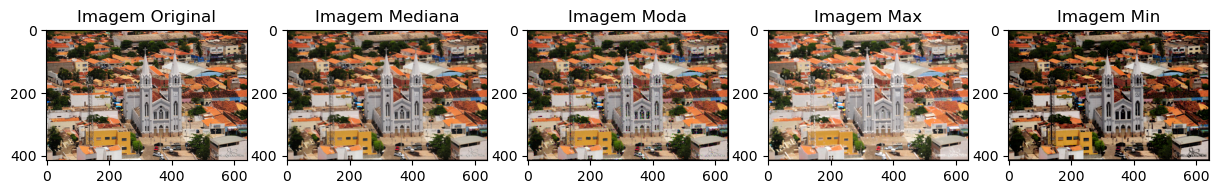

In [268]:
fig = plt.figure(figsize=(15, 15))
fig.add_subplot(1, 5, 1)
plt.title('Imagem Original')
plt.imshow(img, cmap='gray')
fig.add_subplot(1, 5, 2)
plt.title('Imagem Mediana')
plt.imshow(imagem_mediana, cmap='gray')
fig.add_subplot(1, 5, 3)
plt.title('Imagem Moda')
plt.imshow(imagem_moda, cmap='gray')
fig.add_subplot(1, 5, 4)
plt.title('Imagem Max')
plt.imshow(imagem_max, cmap='gray')
fig.add_subplot(1, 5, 5)
plt.title('Imagem Min')    
plt.imshow(imagem_min, cmap='gray')

In [ ]:
plt.imshow(img, cmap='gray')

In [ ]:
plt.imshow(imagem_mediana, cmap='gray')

In [ ]:
def convolucao(imagem, filtro, borda='ignore'):

    # Verifica se a imagem é colorida ou não
    linhas, colunas = imagem.shape[0], imagem.shape[1]

    try:
        canais = imagem.shape[2]
    except:
        canais = 1

    # TRARAR BORDAS
    imagem_bordas_tratadas = trataBordas(imagem, filtro, borda)

    # Processar a imagem
    imagem_processada = np.zeros(imagem.shape)
    
    for i in range(canais):
        pass

    return imagem_processada

In [ ]:
convolucao(img, 'a')